<a href="https://colab.research.google.com/github/jshogland/SpatialModelingTutorials/blob/main/Notebooks/HandlingErrors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handeling Errors Example (Overlay)
In this example we will create some spatial data, highlight two types of errors, track down the solution, and fix our example.

Processing steps:
- Install packages
- Import packages
- Create geodataframe of regional office locations
- Create a bounding box around Missoula and turn that into a geodataframe
- Perform the intersection between the two geodataframes (error 1)
- Look up and fix the issue
- Create a different bounding box
- Perform the overlay (error 2)
- Understand why the error

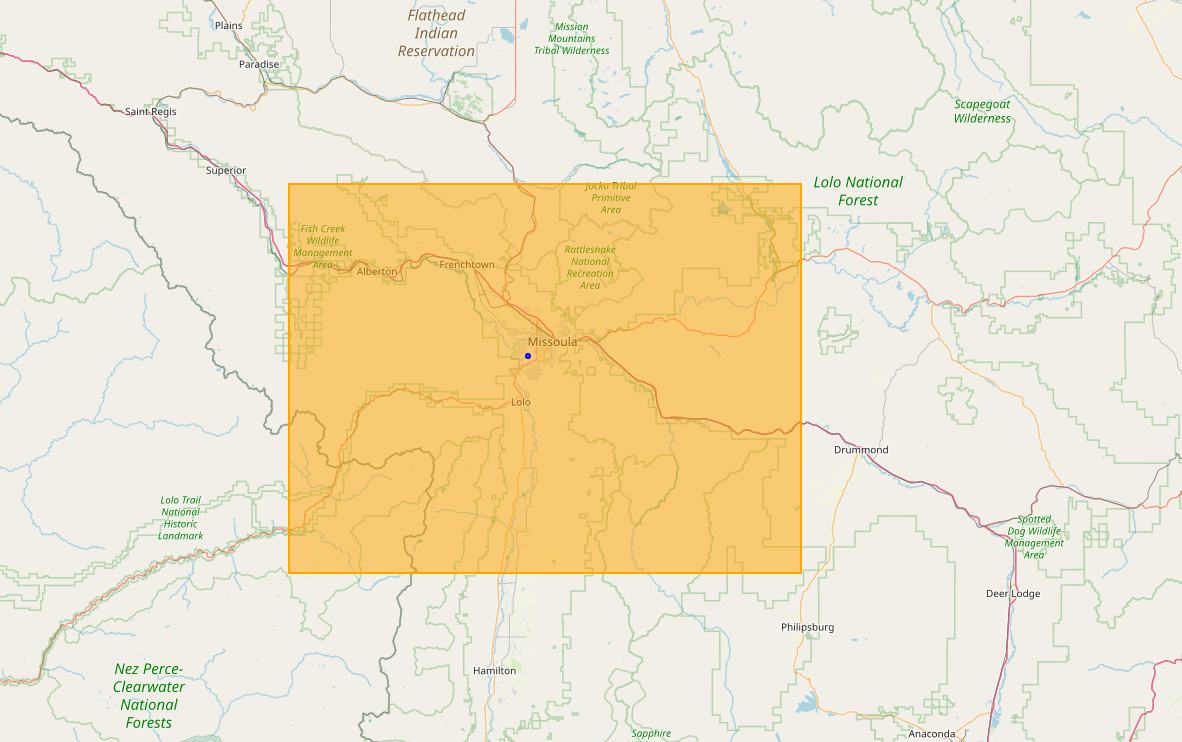

## Install packages

In [ ]:
!pip install mapclassify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 1.1 MB/s eta 0:00:00


## Import packages

In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import numpy as np

## Create a dataframe with the USFS regional offices

In [ ]:
# create a dataframe with the USFS regional offices
regional_office_df = pd.DataFrame({
    'Region': ['1', '2', '3', '4', '5', '6', '8', '9', '10'],
    'State': ['Montana', 'Colorado', 'New Mexico', 'Utah', 'California', 'Oregon', 'Georgia', 'Wisconsin', 'Alaska'],
    'City': ['Missoula', 'Lakewood', 'Albuquerque', 'Ogden', 'Vallejo', 'Portland', 'Atlanta', 'Milwaukee', 'Juneau'],
    'Longitude': [-114.06279, -105.15259, -106.64522, -111.97252, -122.26639, -122.67753,  -84.39318,  -87.90341, -134.42074],
    'Latitude': [46.84365, 39.74319, 35.08120, 41.22071, 38.08773, 45.51458, 33.80348, 43.03892, 58.30170]

})

## Create a bounding box around Missoula

In [ ]:
# use the geopandas library to convert the city lat/lon to coordinates
regional_office_gdf = gpd.GeoDataFrame(regional_office_df, geometry=gpd.points_from_xy(regional_office_df.Longitude, regional_office_df.Latitude))

# now give it an appropriate coordinate reference system
regional_office_gdf.crs = 'EPSG:4326'

# Create a new geoDataFrame with polygons around Missoula, MT and Atlanta, GA with the same coordinate reference system and points as regional_office_gdf.

# create a polygon around Missoula, MT
missoula_poly = Polygon([
    [-114.7198, 46.4346],
      [-114.7198, 47.16597],
        [-113.3125, 47.16597],
          [-113.3125, 46.4346],
            [-114.7198, 46.4346]
])

# create a geodataframe with the missoula polygon note we specify crs while creating the geodataframe
missoula_gdf = gpd.GeoDataFrame(geometry=[missoula_poly], crs=regional_office_gdf.crs)

# visualize the two geodataframes
m1=missoula_gdf.explore(color='orange')
m2=regional_office_gdf.explore(m=m1,color='Blue')
m2


## Perform intersection (error 1)

In [ ]:
# Intersect the missoula_gdf with the regional_office_gdf to get the regional office that is closest to Missoula, MT.
# create a new geodataframe with the intersection of the two geodataframes

missoula_intersect_gdf = gpd.overlay(missoula_gdf, regional_office_gdf, how='intersection')
missoula_intersect_gdf

<ipython-input-11-ebcc24a67962>:4: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  missoula_intersect_gdf = gpd.overlay(missoula_gdf, regional_office_gdf, how='intersection')


,Region,State,City,Longitude,Latitude,geometry


## Perform intersection (fix error)
#### [Geopandas Overlay](https://geopandas.org/en/stable/docs/reference/api/geopandas.overlay.html)

In [ ]:
# oops looks like an error, let's try again with the keep_geom_type=False option

missoula_intersect_gdf = gpd.overlay(missoula_gdf, regional_office_gdf, how='intersection',keep_geom_type=False)
display(missoula_intersect_gdf)
missoula_intersect_gdf.explore()

,Region,State,City,Longitude,Latitude,geometry
0,1,Montana,Missoula,-114.06279,46.84365,POINT (-114.06279 46.84365)


## Create a different bounding box

In [ ]:
# now let's try a different bounding box and see what happens

bb = Polygon([
    [-113.8917, 46.70451],
     [-113.8917, 46.97388],
       [-113.4338, 46.97388],
         [-113.4338, 46.70451],
           [-113.8917, 46.70451]
])


# create a geoDataFrame with the bounding box

random_gdf = gpd.GeoDataFrame(geometry=[bb], crs=regional_office_gdf.crs)

# Now intersect with the regional_office_gdf

random_intersect_gdf = gpd.overlay(random_gdf, regional_office_gdf, how='intersection')
random_intersect_gdf

# No error but we don't get any results! Why? Because the bounding box is not intersecting with any of the regional offices.

,Region,State,City,Longitude,Latitude,geometry


## Visualize the problem

In [ ]:
m1=random_gdf.explore(color='orange')
m2=regional_office_gdf.explore(m=m1)
m2